# Tales from Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Rog\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env
load_dotenv()

# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [3]:
# Fetch the Bitcoin news articles
all_btc_articles = newsapi.get_everything(q='bitcoin',language='en',)
#I am using the 'get everything' api endpoint because there are not that many etherium articles.

In [4]:
# Fetch the Ethereum news articles
all_eth_articles = newsapi.get_everything(q='etherium',
                                      language='en',
                                      )

In [5]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = pd.DataFrame.from_dict(all_btc_articles["articles"])

btc_df.drop(columns=['source','author','url','urlToImage','publishedAt','content'], inplace=True)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        100 non-null    object
 1   description  100 non-null    object
dtypes: object(2)
memory usage: 1.7+ KB


In [6]:
# Create the Ethereum sentiment scores DataFrame
eth_df = pd.DataFrame.from_dict(all_eth_articles["articles"])
eth_df.drop(columns=['source','author','url','urlToImage','publishedAt','content'], inplace=True)
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        14 non-null     object
 1   description  14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [7]:
# Instantiate SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [8]:
btc_df.head(5)

,title,description
0,Texas heatwave and energy crunch curtails Bitc...,Bitcoin miners in Texas powered down to respon...
1,Putin signs law prohibiting crypto payments in...,People in Russia will soon no longer be allowe...
2,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...
3,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...


In [9]:
eth_df.head(5)

,title,description
0,Magic: The Gathering’s Fortnite cards are up f...,Magic: The Gathering and Fortnite come togethe...
1,West Philly House That Can Mine Crypto Sells F...,The Mantua property was renovated after sittin...
2,Brian Fanzo dishes top NFT mistakes to avoid,"It’s clear NFTs aren’t going away, despite the..."
3,Magic: The Gathering Begins Preorders For The ...,"Wizards of the Coast, the tabletop gaming comp..."
4,HTC Desire 22 Pro is a mid-range phone attempt...,"In the early days of Android, HTC was one of t..."


## What do we want to learn?
Determine the valence of the article through reading the headline of the article. 
Valence, or hedonic tone, is the affective quality referring to the intrinsic attractiveness/"good"-ness or 
averseness/"bad"-ness of an event, object, or situation. The term also characterizes and categorizes specific emotions. Through sentiment analysis, we can
determine the valence of the article.


In [10]:
# Describe the Bitcoin Sentiment
btc_daily_sent = [] #analyze the sentiment for each article's headline
btc_sentiment = [] #collect the mean sentiment for bitcoin from each article

for title in btc_df['title']:
    btc_daily_sent.append(sid.polarity_scores(title)["compound"]) #find the compount polarity score to determine the sentiment.

btc_sentiment.append(sum(btc_daily_sent) / len(btc_daily_sent)) #find the mean sentiment


In [11]:
# Describe the Ethereum Sentiment
eth_daily_sent = [] #analyze the sentiment for each article's headline
eth_sentiment = [] #collect the mean sentiment for bitcoin from each article

for title in eth_df['title']:
    eth_daily_sent.append(sid.polarity_scores(title)["compound"]) #find the compount polarity score to determine the sentiment.

eth_sentiment.append(sum(eth_daily_sent) / len(eth_daily_sent)) #find the mean sentiment

In [12]:
print(len(btc_daily_sent))
print(len(eth_daily_sent))
#There are way more instances of btc articles.To create a DF we will have to use a for loop.

100
14


In [13]:
#Make a dataframe to analyze the results
my_dict = dict(btc=btc_daily_sent,eth=eth_daily_sent)

In [14]:
daily_sent_df = pd.DataFrame.from_dict(my_dict, orient='index')
daily_sent_df = daily_sent_df.transpose()
daily_sent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   btc     100 non-null    float64
 1   eth     14 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [15]:
daily_sent_df.head()

,btc,eth
0,0.2732,0.0000
1,0.0000,0.0000
2,0.2023,-0.4404
3,0.1779,0.0000
4,-0.2960,0.4019


In [16]:
#Find the highest daily score
highest_Btc_sent = daily_sent_df['btc'].max()
highest_Eth_sent = daily_sent_df['eth'].max()

#Find the lowest daily score
lowest_Btc_sent = daily_sent_df['btc'].min()
lowest_Eth_sent = daily_sent_df['eth'].min()

print(f'BTC High: {highest_Btc_sent}')
print(f'ETH High: {highest_Eth_sent}')
print(f'BTC Low: {lowest_Btc_sent}')
print(f'ETH Low: {lowest_Eth_sent}')
print(f'----------------------------')
print(f'Mean Scores:')
print(f'BTC Mean Sentiment: {btc_sentiment}')
print(f'ETH Mean Sentiment: {eth_sentiment}')



BTC High: 0.6908
ETH High: 0.4939
BTC Low: -0.91
ETH Low: -0.4404
----------------------------
Mean Scores:
BTC Mean Sentiment: [-0.101489]
ETH Mean Sentiment: [0.04550714285714286]


In [17]:
print(f'The highest mean positive score is Etherium at {eth_sentiment}.')
print(f'The highest daily sentiment score is from Bitcoin at {highest_Btc_sent}.')
print(f'The lowest daily sentiment score is from Bitcoin at {lowest_Btc_sent}.')

The highest mean positive score is Etherium at [0.04550714285714286].
The highest daily sentiment score is from Bitcoin at 0.6908.
The lowest daily sentiment score is from Bitcoin at -0.91.


### Questions:

Q: Which coin had the highest mean positive score?

A: The highest mean positive score is from Etherium [0.04550714285714286].

Q: Which coin had the highest negative score?

A: The lowest daily sentiment score is from Bitcoin at -0.91.

Q. Which coin had the highest positive score?

A: The highest daily sentiment score is from Etherium at 0.6908.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [18]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
regex = re.compile("[^a-zA-Z ]")

In [19]:
print(btc_df['description'][0])

Bitcoin miners in Texas powered down to respond to an energy crunch triggered by a punishing heatwave. Energy demand from cryptomining is growing in the state.


In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union({
    'char', 
    'chars',
    'cryptocurrencies',
    'cryptocurrency',
    'crypto',
    'ha',
    'the',
    'a',
    'for',
    'of',
    'reuters',
    '[',
    ']',
    '...',
    '(, )',
    '(), -',
})

In [41]:
# Complete the tokenizer function
def tokenize(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase and remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [42]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenizer(description) for description in btc_df['description']]
btc_df.head()

,title,description,tokens
0,Texas heatwave and energy crunch curtails Bitc...,Bitcoin miners in Texas powered down to respon...,"[bitcoin, miner, texas, powered, respond, ener..."
1,Putin signs law prohibiting crypto payments in...,People in Russia will soon no longer be allowe...,"[people, russia, soon, longer, allowed, use, d..."
2,Recommended Reading: A blockchain primer,Does the crypto crash mean the blockchain Is o...,"[crash, mean, blockchain, ?, stephen, j., dubn..."
3,Three Arrows Capital Ordered to Liquidate All ...,The rapid collapse of the massive crypto hedge...,"[rapid, collapse, massive, hedge, fund, ,, man..."
4,"Tesla Sells 75% of its Bitcoin Holdings, Elon ...",<ol><li>Tesla Sells 75% of its Bitcoin Holding...,"[<, ol, >, <, li, >, tesla, sells, 75, %, bitc..."


In [43]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenizer(description) for description in eth_df['description']]
eth_df.head()

,title,description,tokens
0,Magic: The Gathering’s Fortnite cards are up f...,Magic: The Gathering and Fortnite come togethe...,"[magic, :, gathering, fortnite, come, together..."
1,West Philly House That Can Mine Crypto Sells F...,The Mantua property was renovated after sittin...,"[mantua, property, wa, renovated, sitting, aba..."
2,Brian Fanzo dishes top NFT mistakes to avoid,"It’s clear NFTs aren’t going away, despite the...","[’, clear, nfts, ’, going, away, ,, despite, c..."
3,Magic: The Gathering Begins Preorders For The ...,"Wizards of the Coast, the tabletop gaming comp...","[wizards, coast, ,, tabletop, gaming, company,..."
4,HTC Desire 22 Pro is a mid-range phone attempt...,"In the early days of Android, HTC was one of t...","[early, day, android, ,, htc, wa, one, top, sm..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [44]:
from collections import Counter
from nltk import ngrams

In [45]:
def get_words(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenizer(corpus_string)
    words = Counter(processed)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

In [46]:
def get_bigrams(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenizer(corpus_string)
    bigrams = ngrams(processed, n=2)
    bigrams_list = Counter(bigrams)
    return bigrams_list

In [47]:
def token_count(tokens, ngrams=False, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(N))
    columns = ['word', 'count'] if ngrams == False else ['bigram', 'count']
    return pd.DataFrame(list(top_10.items()), columns=columns)

In [48]:
# Generate the Bitcoin N-grams where N=2
btc_corpus = [article['content'] for article in all_btc_articles['articles']]
btc_bigrams = get_bigrams(btc_corpus)
token_count(btc_bigrams)

,word,count
0,"((, ))",22
1,"(), -)",22
2,"(,, july)",10
3,"(year, ,)",6
4,"(june, 30)",6
5,"(30, ()",6
6,"(,, june)",6
7,"(hedge, fund)",5
8,"(bitcoin, holding)",5
9,"(london, ,)",5


In [49]:
# Generate the Ethereum N-grams where N=2
eth_corpus = [article['content'] for article in all_eth_articles['articles']]
eth_bigrams = get_bigrams(eth_corpus)
token_count(eth_bigrams)

,word,count
0,"(magic, :)",4
1,"(secret, lair)",4
2,"(wild, experiment)",2
3,"(experiment, called)",2
4,"(called, secret)",2
5,"(lair, hit)",2
6,"(hit, ,)",2
7,"(wizards, coast)",2
8,"(:, gathering)",2
9,"(shiba, inu)",2


In [50]:
#btc_corupus is currently a list of strings. The NLTK toeknizer function requires a single
#string is passed
#Therefore, the join() function is called to concatenate the list of strings into one string.
btc_corpus_string = ''.join(btc_corpus)


In [51]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = tokenizer(btc_corpus_string)
token_count(btc_words)

,word,count
0,",",142
1,.,90
2,bitcoin,45
3,(,32
4,),31
5,'s,29
6,-,26
7,…,21
8,said,16
9,july,16


In [52]:
#View btc_corpus to string.
eth_corpus_string = ''.join(eth_corpus)

In [53]:
# Use token_count to get the top 10 words for Ethereum
eth_words = tokenizer(eth_corpus_string)
token_count(eth_words)

,word,count
0,",",27
1,.,10
2,:,7
3,magic,4
4,secret,4
5,lair,4
6,’,4
7,time,4
8,day,3
9,new,3


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

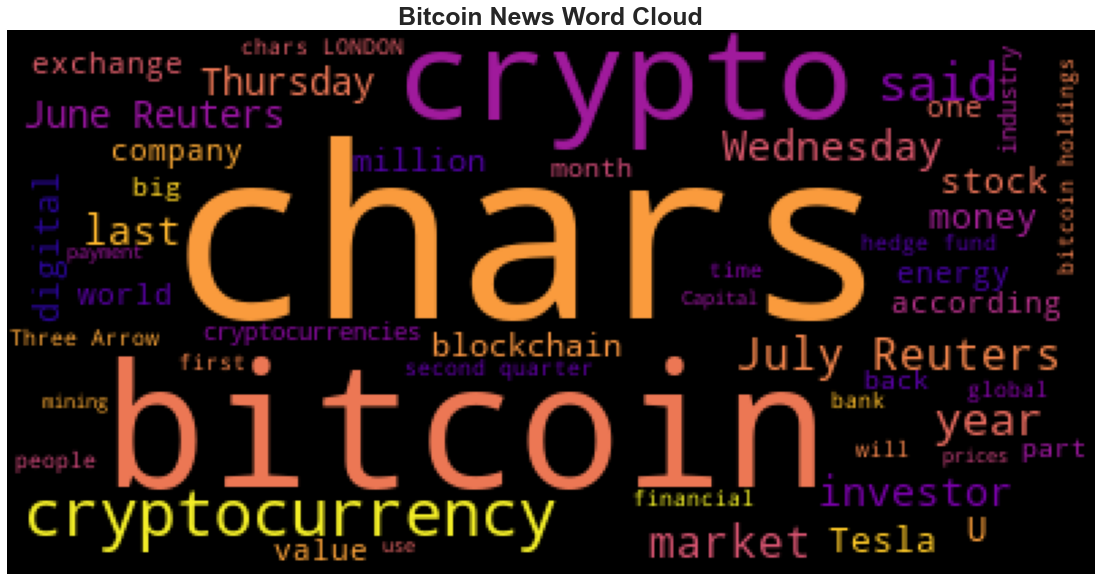

In [61]:
# Generate the Bitcoin word cloud
#btc_tokens = tokenize(btc_corpus_string)
btc_wc = WordCloud(colormap='plasma', max_words=50).generate(btc_corpus_string)
plt.title('Bitcoin News Word Cloud', fontdict={'fontsize': 25, 'fontweight': 'bold'})
plt.axis('off')
plt.imshow(btc_wc)
plt.show()

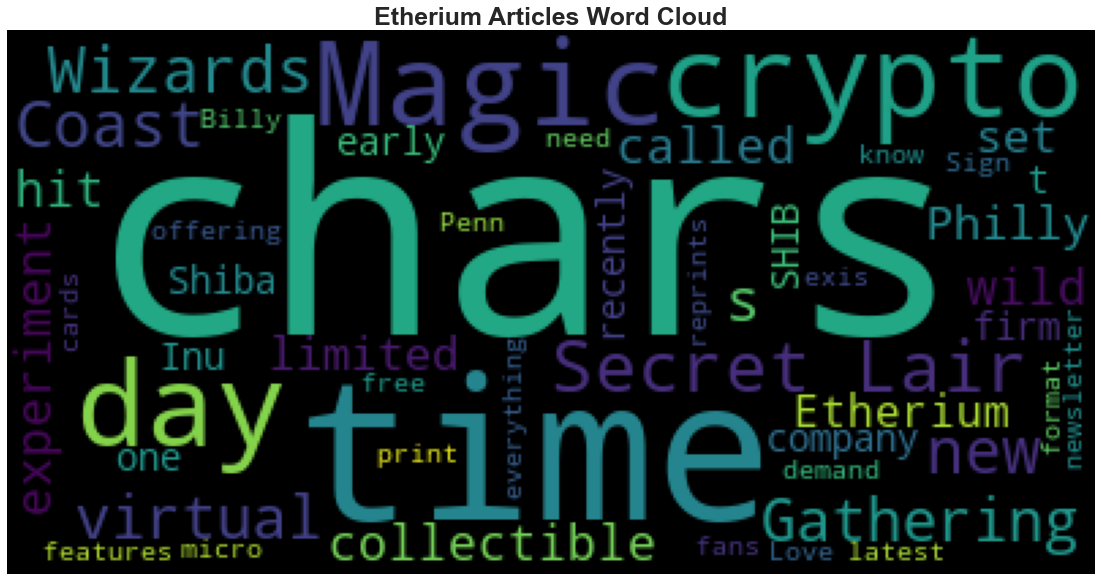

In [64]:
# Generate the Ethereum word cloud
eth_wc = WordCloud(max_words=50).generate(eth_corpus_string)
plt.title('Etherium Articles Word Cloud', fontdict={'fontsize': 25, 'fontweight': 'bold'})
plt.axis('off')
plt.imshow(eth_wc)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [65]:
import spacy
from spacy import displacy

In [66]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 6.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [67]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [70]:
btc_corpus_string = ' '.join(btc_corpus).replace('\n', '')
btc_corpus_string[:100]

'Miners voluntarily powered down as energy demand and prices spiked \rAn aerial view of the Whinstone '

In [73]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_corpus_string)
btc_doc.user_data["title"] = "Bitcoin NER" # Add a title to the document

In [74]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [75]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['the Whinstone US Bitcoin', 'Rockdale', 'Texas', 'October 9th, 2021', 'North Ameri', 'Russia', 'Russian', 'Vladimir Putin', 'Stephen J. Dubner', 'Freakonomics Radio', 'Recommended Listening', 'Freakonomics Radio', 'three', 'Bi', '+734', 'one', 'Tuesday', 'Tesla', 'Bitcoin', 'Q2', 'Grayscale Investments', 'the Securities and Exchange Commission', 'US', 'ETF', 'Just an hour', 'SEC', '2021', 'Tesla', '$936 million', 'the second quarter of 2022', 'Bitcoin', '75', '2022', 'Wednesday', '$2.3 billion', 'second-quarter', 'a record $3.3 billion', 'first', 'Reuters', 'Reuters', 'months', 'El Salvador', 'Nayib Bukele', 'Bitcoin', 'more than 50 percent', 'this year', 'Reuters', 'winter', 'two', 'NEW YORK', 'July 20', 'Reuters', 'Wednesday', 'Tesla Inc', 'TSLA.O', 'about 75%', 'fiat', 'Kellogg', 'the week to June 24', 'Ilan Rubens', 'June 29', 'Reuters', 'The U.S. Securities and Exchange Commission', 'Wednesday', 'Grayscale', 'Reuters', '6.1%', '18,866.77', 'GMT', 'Thursday', '1,226.41', '60.9%', 

---

### Ethereum NER

In [76]:
# Concatenate all of the Ethereum text together
eth_corpus_string = ' '.join(eth_corpus).replace('\n', '')
eth_corpus_string[:100]

'Magic: The Gatherings wild experiment called Secret Lair is a hit, offering fans the most collectibl'

In [77]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_corpus_string)
eth_doc.user_data["title"] = "Etherium NER" # Add a title to the document

In [78]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [79]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['the Whinstone US Bitcoin', 'Rockdale', 'Texas', 'October 9th, 2021', 'North Ameri', 'Russia', 'Russian', 'Vladimir Putin', 'Stephen J. Dubner', 'Freakonomics Radio', 'Recommended Listening', 'Freakonomics Radio', 'three', 'Bi', '+734', 'one', 'Tuesday', 'Tesla', 'Bitcoin', 'Q2', 'Grayscale Investments', 'the Securities and Exchange Commission', 'US', 'ETF', 'Just an hour', 'SEC', '2021', 'Tesla', '$936 million', 'the second quarter of 2022', 'Bitcoin', '75', '2022', 'Wednesday', '$2.3 billion', 'second-quarter', 'a record $3.3 billion', 'first', 'Reuters', 'Reuters', 'months', 'El Salvador', 'Nayib Bukele', 'Bitcoin', 'more than 50 percent', 'this year', 'Reuters', 'winter', 'two', 'NEW YORK', 'July 20', 'Reuters', 'Wednesday', 'Tesla Inc', 'TSLA.O', 'about 75%', 'fiat', 'Kellogg', 'the week to June 24', 'Ilan Rubens', 'June 29', 'Reuters', 'The U.S. Securities and Exchange Commission', 'Wednesday', 'Grayscale', 'Reuters', '6.1%', '18,866.77', 'GMT', 'Thursday', '1,226.41', '60.9%', 

---